# Descriptive Statistics
- Statistics summarization & describe main features of dataset.
- Distribution, central tendency (mean, median, mode), variability (std, var)

1. Mean(Average):
     - sum of all divided by total number of values
     - sensitive to outliers  (extrem values can skew the mean).
2. Median(mid-value):
     - middle value when the data is ordered.
     - or the avg the two middle values of even number of obersevations.
     - robust to outliers, making it better measure of central tendency or skewed distributions.
3. Mode(Frequency)
     - Value(S) that appear most frequently in the dataset
     - Useful for categorical data or to identify the most common value in numeric data.
     - A dataset can be unimodel(one mode), bimodal, multi-model.
4. Variance:
     - Measures how spread out the data points are from the mean.
     - High variance indicates greater spread, low variance indicates data points closer to the mean.
5. Standard Deviation
     - Square root of variance, expresssed in the same units as the data.
     - A smaller SD means data is tightly clustered around the mean.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
mean = iris.petal_length.mean()
median = iris.petal_length.median()
mode = iris.petal_length.mode()
var = iris.petal_length.var()
std = iris.petal_length.std()


In [4]:
print(f"mean: {mean:.2f}")
print(f"median: {median:.2f}")
print(f"mode:\n{mode}")
print(f"var: {var:.2f}")
print(f"std: {std:.2f}")


mean: 3.76
median: 4.35
mode:
0    1.4
1    1.5
Name: petal_length, dtype: float64
var: 3.12
std: 1.77


# Interpretation
- mean(3.76): the average petal length is about 3.76cm, but this may be influenced by outliers or skewness.
- median(4.35): the middle value is higher than mean, suggesting a left-skewed distributions(more smaller values)
- mode(1.4, 1.5) : the most frequent petal length is around 1.4 or 1.5
- var(3.12) and std(1.77) : the data has moderate spread, with most petal length within +1.77 cm of the mean.



In [5]:
import matplotlib.pyplot as plt

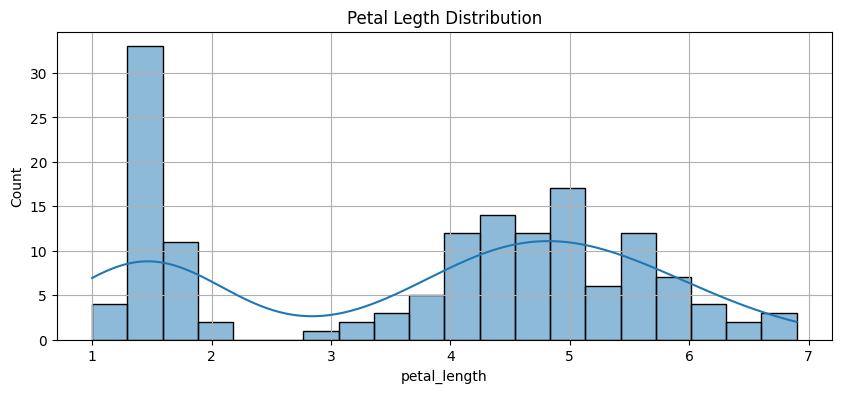

In [6]:
plt.figure(figsize=(10,4))
sns.histplot(iris, x = 'petal_length',bins=20, kde=True).set_title('Petal Legth Distribution')
plt.grid()
plt.show()

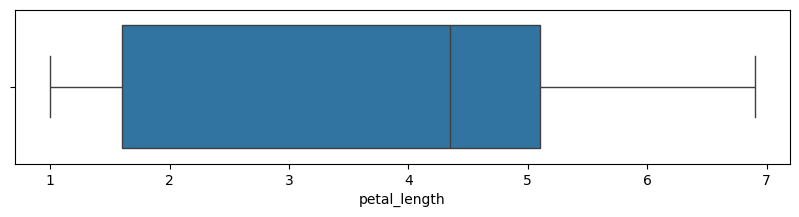

In [7]:
plt.figure(figsize=(10,2))
sns.boxplot(iris, x='petal_length')
plt.show()

# Correlation
  - Correlation measures the strength and the direction of linear relationship btn variables(Continuous)
  - It's a standard metric that ranges from -1 to +1
  - '-1' : perfect negeative correlation
  - '0'  : no correlation
  - '1' : perfect positive correlation

In [8]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
iris.sepal_length.corr(iris.petal_length)

np.float64(0.8717537758865831)

In [10]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


In [11]:
corr_metrix = iris.drop(columns='species').corr()
corr_metrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

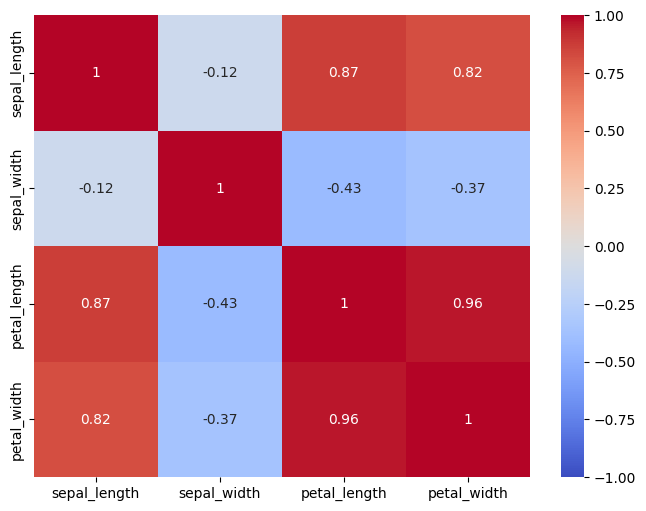

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_metrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: xlabel='petal_length', ylabel='petal_width'>

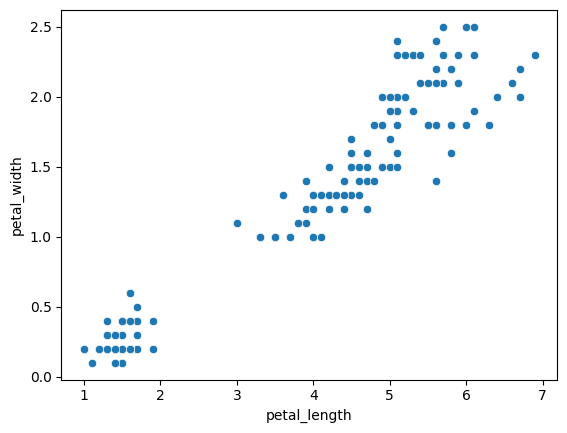

In [14]:
sns.scatterplot(iris, x='petal_length', y='petal_width')

### Interpretation
- The correlation of ~0.96 indicaets a strong linear relationship petal_length and petal _width, 
  meaning petal_length is a good predictor of petal_width in a linear model.

# Co-variance 
- It measures how two variables change together.
- It indicates the direction of the relations but not it's strength or scale.
- +ve  : increase together
- -ve  : one variable increase the other decrease.
- zero : no consistent variable

In [15]:
iris[['sepal_length','petal_length']].cov()

,sepal_length,petal_length
sepal_length,0.685694,1.274315
petal_length,1.274315,3.116278


In [16]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


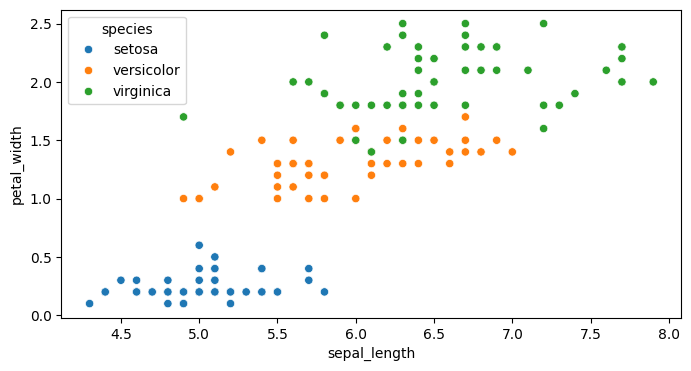

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(iris, x='sepal_length', y='petal_width',hue='species')
plt.show()

### Practice on Tips Dataset